This is a simple tutorial on Networkx, a Python module that is widely used for social network analysis. In simple terms, a network consists of a set of nodes (or vertices) and edges (aka links). A link or edge between two nodes denotes some relationship between them. For example, a link may represent a friendship relationship between two persons, or a litigation between two companies. Such networks can provide insights into behaviors of the nodes (i.e., people, companies, etc.). Furthermore, structural properties of the network and/or attributes of the node at one time period may be used to predict links in a subsequent time period.

Much of what I present in this notebook is based on the wonderful book, "Graph Machine Learning" by Claudio Stamile, Aldo Marzullo, and Enrico Deusebio, Packt Publishing (2021). It is definitely a book that I would add to my collections.

In [1]:
import networkx as nx

In [2]:
persons = ['john', 'mary', 'peter', 'maya', 'nancy', 'joe'] #these will be nodes
friends = [('john', 'mary'),('john', 'maya'), ('mary', 'peter'), ('mary', 'nancy'), ('mary', 'maya'),
           ('peter', 'joe'), ('maya', 'joe'), ('nancy', 'john')] #each tuple represents a friendship tie or an edge

In [3]:
#Let us create an undirected Graph using Networkx
G = nx.Graph()
#let us add the nodes we created earlier
G.add_nodes_from(persons)
#Let us add the edges
G.add_edges_from(friends)

In [4]:
#let us look at all the nodes of a graph
G.nodes

NodeView(('john', 'mary', 'peter', 'maya', 'nancy', 'joe'))

In [5]:
#the edges...
G.edges

EdgeView([('john', 'mary'), ('john', 'maya'), ('john', 'nancy'), ('mary', 'peter'), ('mary', 'nancy'), ('mary', 'maya'), ('peter', 'joe'), ('maya', 'joe')])

In [6]:
#check to see if our graph is directed
G.is_directed()

False

In [7]:
#How many nodes do we have?
G.number_of_nodes() #This is referred to as the 'Order' of the graph

6

In [8]:
#How many edges do we have?
G.number_of_edges() #This number is called the 'Size' of the graph

8

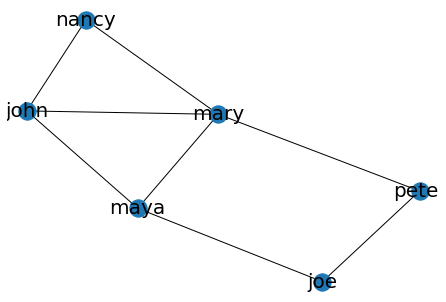

In [11]:
#Let us draw our network
nx.draw(G, with_labels = True, font_size = 20)

In [12]:
#removing an edge --- you can also remove multiple edges using a list of edges
G.remove_edges_from([('john','mary')])
print(G.edges)

[('john', 'maya'), ('john', 'nancy'), ('mary', 'peter'), ('mary', 'nancy'), ('mary', 'maya'), ('peter', 'joe'), ('maya', 'joe')]


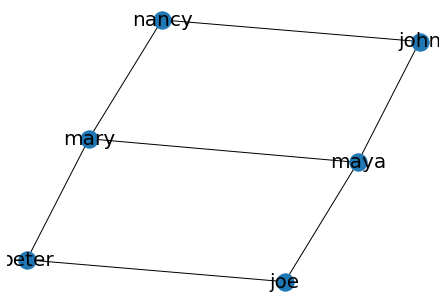

In [13]:
nx.draw(G, with_labels = True, font_size = 20)

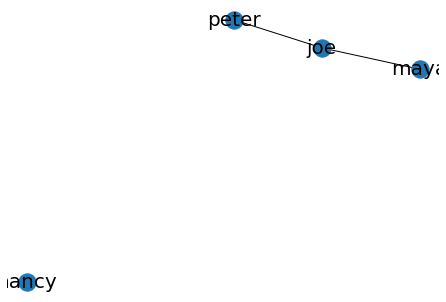

In [14]:
#let us remove some nodes
G.remove_nodes_from({'mary','john'})
nx.draw(G, with_labels = True, font_size = 20)

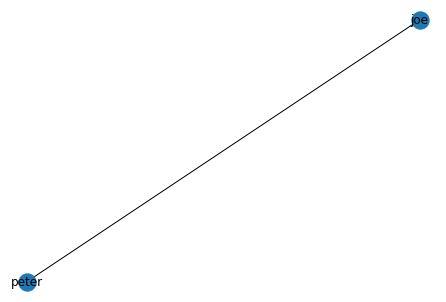

In [18]:
#Let us at an ego's graph
peter_ego_graph = nx.ego_graph(G, 'peter')
nx.draw(peter_ego_graph, with_labels = True)

In [20]:
#let us print the neighbors of every node
print({v: list(G.neighbors(v)) for v in G.nodes})

{'peter': ['joe'], 'maya': ['joe'], 'nancy': [], 'joe': ['peter', 'maya']}


In [21]:
#let us look at the degree of each of the nodes -- degree of a node in an undirected graph is the number of ties it has
print({v: G.degree(v) for v in G.nodes})

{'peter': 1, 'maya': 1, 'nancy': 0, 'joe': 2}


In [15]:
#let us look at a Digraph
nodes = ['A', 'B','C','D']
edges = [('A', 'C'), ('B', 'A'), ('B', 'D'), ('C', 'A')]

In [16]:
DG = nx.DiGraph()
DG.add_nodes_from(nodes)
DG.add_edges_from(edges)

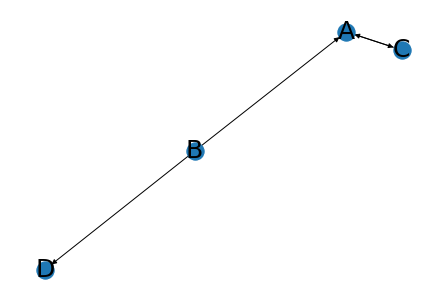

In [17]:
nx.draw(DG, with_labels = True, font_size = 25)

In [23]:
#let us look at neighbors
print({v: list(DG.neighbors(v)) for v in DG.nodes}) #note that direction matters


{'A': ['C'], 'B': ['A', 'D'], 'C': ['A'], 'D': []}


In [30]:
#In a directed graph, you have in-degree and out-degree
#in-degree of a node is the of edges coming into the node, while outdegree is the number of edges directed away from the node
print("Indegree: ",{v: DG.in_degree(v) for v in DG.nodes})
print("Outdegree: ",{v: DG.out_degree(v) for v in DG.nodes})

Indegree:  {'A': 2, 'B': 0, 'C': 1, 'D': 1}
Outdegree:  {'A': 1, 'B': 2, 'C': 1, 'D': 0}


In [31]:
#Weighted graphs - a weight can represent the strength of a tie
nodes = ['A','B','C','D']
weighted_edges = [('A', 'C', 5), ('A','D', 12),('B','C', 7), ('D','C', 20)]
WG = nx.Graph()
WG.add_nodes_from(nodes)
WG.add_weighted_edges_from(weighted_edges)


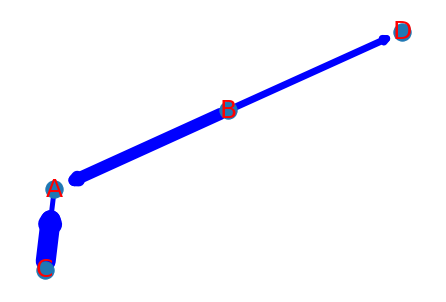

In [33]:
#let us draw the graph with the width of edges determined by the weight
weights = nx.get_edge_attributes(WG, 'weight').values()
nx.draw(DG, with_labels = True, font_size = 25, width = list(weights), edge_color = 'b', font_color = 'r')

In [34]:
#creating a graph from a pandas dataframe
d = {'plaintiff':['A', 'A', 'A', 'B'], 'defendant': ['B', 'C', 'D', 'A']}
import pandas as pd
df = pd.DataFrame(d)
df

,plaintiff,defendant
0,A,B
1,A,C
2,A,D
3,B,A


In [36]:
G = nx.from_pandas_edgelist(df, 'plaintiff','defendant',create_using = nx.DiGraph)

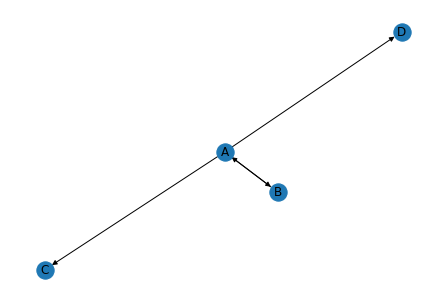

In [37]:
nx.draw(G, with_labels = 'True')

Let us read edges from a text file that has the following format:
john	mary
john	peter
john	maya
mary	peter
mary	maya
maya	joseph
maya	nancy

In [2]:
import networkx as nx
g = nx.read_edgelist("/users/snerur/edgelist.txt")

In [5]:
import matplotlib.pyplot as plt

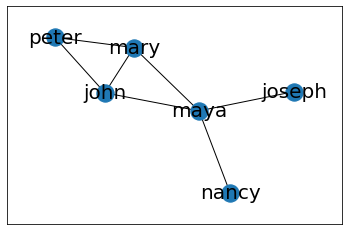

In [8]:
pos = nx.spring_layout(g, k = 0.3)
nx.draw_networkx(g, pos, font_size = 20)
plt.gca().margins(0.2, 0.2)

In [10]:
#what if we wanted a directed graph instead?
g = nx.read_edgelist("/users/snerur/edgelist.txt", create_using = nx.DiGraph)

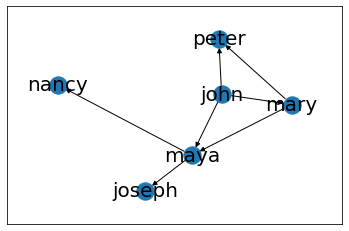

In [43]:
pos = nx.spring_layout(g, k = 0.9, iterations = 20)
nx.draw_networkx(g, pos, font_size = 20)
plt.gca().margins(0.15, 0.15)

In [3]:
#let us see how we can read edges and adjacency matrices from a dataframe
d = {"A": [0, 1, 1, 0], "B": [1, 0, 0, 1], "C":[1,0,0,1], "D": [0,1,1,0]}
import pandas as pd
df = pd.DataFrame(d, index = d.keys())
df

,A,B,C,D
A,0,1,1,0
B,1,0,0,1
C,1,0,0,1
D,0,1,1,0


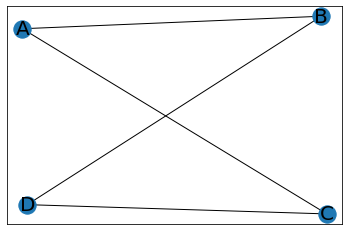

In [5]:
pos = nx.spring_layout(g, k = 0.9, iterations = 20)
g = nx.from_pandas_adjacency(df)
nx.draw_networkx(g, pos, font_size = 20)

In [6]:
#let us create an edgelist
d = {"Source": ["A", "A", "B", "B","C", "D", "D"], "Target": ["B", "D", "C", "A", "A", "A", "B"]}
df = pd.DataFrame(d)

In [9]:
g = nx.from_pandas_edgelist(df, source = "Source", target = "Target", create_using=nx.DiGraph)

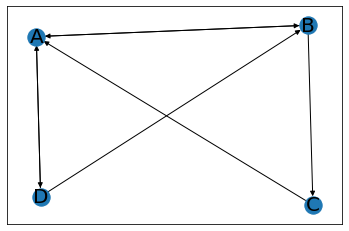

In [10]:
nx.draw_networkx(g, pos, font_size = 20)

In [11]:
#you can convert a graph to an adjacency matrix, edgelist, etc.
nx.to_numpy_matrix(g) #convert to numpy matrix


matrix([[0., 1., 1., 0.],
        [1., 0., 0., 1.],
        [1., 1., 0., 0.],
        [1., 0., 0., 0.]])

In [14]:
nx.to_pandas_edgelist(g)

,source,target
0,A,B
1,A,D
2,B,C
3,B,A
4,D,A
5,D,B
6,C,A


In [15]:
nx.to_pandas_adjacency(g)

,A,B,D,C
A,0.0,1.0,1.0,0.0
B,1.0,0.0,0.0,1.0
D,1.0,1.0,0.0,0.0
C,1.0,0.0,0.0,0.0
